<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [5]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.531736,50.451860,0.000323,139.983919,139.983538,0.000381
1,0.0,1.0,71.172519,63.835453,-0.000650,145.007323,145.007941,-0.000618
2,0.0,2.0,44.116550,26.568400,0.003366,80.688316,80.684924,0.003392
3,0.0,3.0,52.311510,27.848716,-0.002409,90.157816,90.160188,-0.002372
4,0.0,4.0,32.215890,48.623407,-0.000348,90.838950,90.839311,-0.000361
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.962656,77.520813,-0.000139,161.483330,161.483386,-0.000057
249996,999.0,246.0,55.165347,34.094311,0.000433,99.260091,99.259698,0.000393
249997,999.0,247.0,70.476081,23.681075,-0.002165,104.154990,104.157063,-0.002073
249998,999.0,248.0,74.673527,47.423931,-0.000490,132.096969,132.097348,-0.000380


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.531736,50.451860,0.000323,139.983919,139.983538,0.000381
1,0.0,1.0,71.172519,63.835453,-0.000650,145.007323,145.007941,-0.000618
2,0.0,2.0,44.116550,26.568400,0.003366,80.688316,80.684924,0.003392
3,0.0,3.0,52.311510,27.848716,-0.002409,90.157816,90.160188,-0.002372
4,0.0,4.0,32.215890,48.623407,-0.000348,90.838950,90.839311,-0.000361
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.962656,77.520813,-0.000139,161.483330,161.483386,-0.000057
249996,999.0,246.0,55.165347,34.094311,0.000433,99.260091,99.259698,0.000393
249997,999.0,247.0,70.476081,23.681075,-0.002165,104.154990,104.157063,-0.002073
249998,999.0,248.0,74.673527,47.423931,-0.000490,132.096969,132.097348,-0.000380


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.531736  50.451860  0.000323  139.983919  139.983538  0.000381
      1.0    71.172519  63.835453 -0.000650  145.007323  145.007941 -0.000618
      2.0    44.116550  26.568400  0.003366   80.688316   80.684924  0.003392
      3.0    52.311510  27.848716 -0.002409   90.157816   90.160188 -0.002372
      4.0    32.215890  48.623407 -0.000348   90.838950   90.839311 -0.000361
...                ...        ...       ...         ...         ...       ...
999.0 245.0  73.962656  77.520813 -0.000139  161.483330  161.483386 -0.000057
      246.0  55.165347  34.094311  0.000433   99.260091   99.259698  0.000393
      247.0  70.476081  23.681075 -0.002165  104.154990  104.157063 -0.002073
      248.0  74.673527  47.423931 -0.000490  132.096969  132.097348 -0.000380
      249.0  34.987869  43.008044  0.001540   87.997453   87.996123  0.001329

[250000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.531736  50.451860  0.000323  139.983919  139.983538  0.000381
      1.0    71.172519  63.835453 -0.000650  145.007323  145.007941 -0.000618
      2.0    44.116550  26.568400  0.003366   80.688316   80.684924  0.003392
      3.0    52.311510  27.848716 -0.002409   90.157816   90.160188 -0.002372
      4.0    32.215890  48.623407 -0.000348   90.838950   90.839311 -0.000361
...                ...        ...       ...         ...         ...       ...
999.0 245.0  73.962656  77.520813 -0.000139  161.483330  161.483386 -0.000057
      246.0  55.165347  34.094311  0.000433   99.260091   99.259698  0.000393
      247.0  70.476081  23.681075 -0.002165  104.154990  104.157063 -0.002073
      248.0  74.673527  47.423931 -0.000490  132.096969  132.097348 -0.000380
      249.0  34.987869  43.008044  0.001540   87.997453   87.996123  0.001329

[250000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.531736,50.451860,0.000323,139.983919,139.983538,0.000381
1,0.0,1.0,71.172519,63.835453,-0.000650,145.007323,145.007941,-0.000618
2,0.0,2.0,44.116550,26.568400,0.003366,80.688316,80.684924,0.003392
3,0.0,3.0,52.311510,27.848716,-0.002409,90.157816,90.160188,-0.002372
4,0.0,4.0,32.215890,48.623407,-0.000348,90.838950,90.839311,-0.000361
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.962656,77.520813,-0.000139,161.483330,161.483386,-0.000057
249996,999.0,246.0,55.165347,34.094311,0.000433,99.260091,99.259698,0.000393
249997,999.0,247.0,70.476081,23.681075,-0.002165,104.154990,104.157063,-0.002073
249998,999.0,248.0,74.673527,47.423931,-0.000490,132.096969,132.097348,-0.000380


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.531736  50.451860  0.000323  139.983919  139.983538  0.000381
      1.0    71.172519  63.835453 -0.000650  145.007323  145.007941 -0.000618
      2.0    44.116550  26.568400  0.003366   80.688316   80.684924  0.003392
      3.0    52.311510  27.848716 -0.002409   90.157816   90.160188 -0.002372
      4.0    32.215890  48.623407 -0.000348   90.838950   90.839311 -0.000361
...                ...        ...       ...         ...         ...       ...
999.0 245.0  73.962656  77.520813 -0.000139  161.483330  161.483386 -0.000057
      246.0  55.165347  34.094311  0.000433   99.260091   99.259698  0.000393
      247.0  70.476081  23.681075 -0.002165  104.154990  104.157063 -0.002073
      248.0  74.673527  47.423931 -0.000490  132.096969  132.097348 -0.000380
      249.0  34.987869  43.008044  0.001540   87.997453   87.996123  0.001329

[250000 rows x 6 columns]

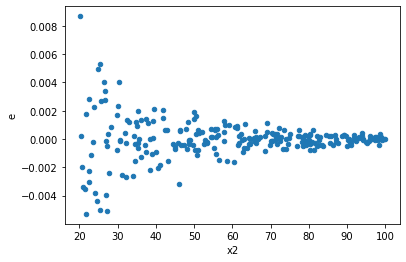

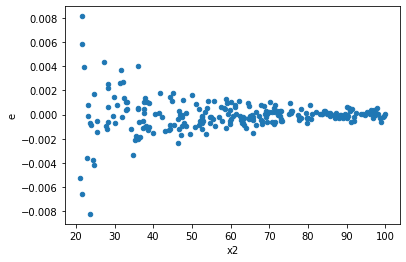

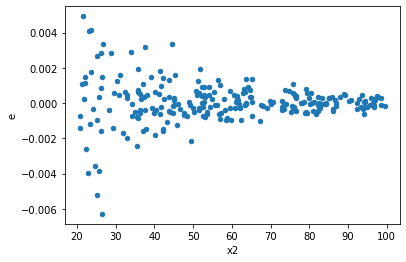

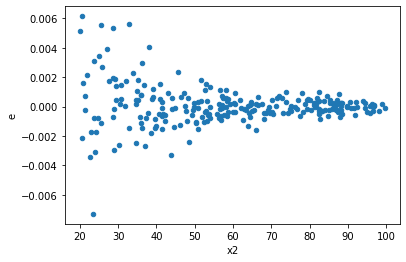

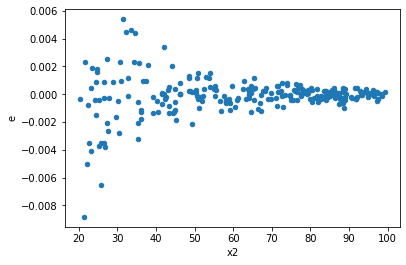

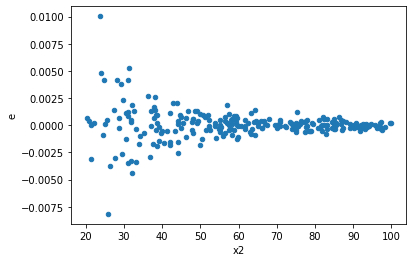

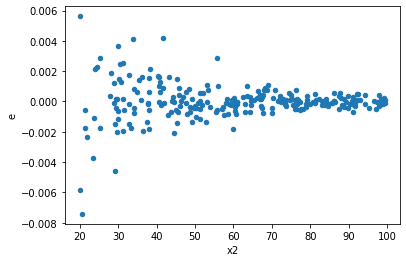

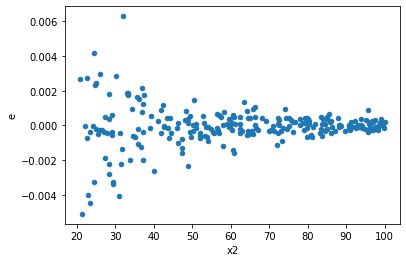

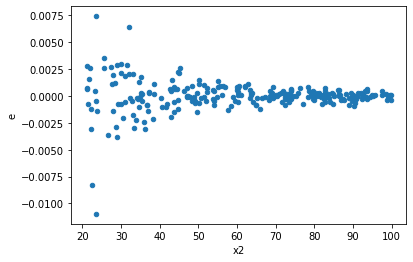

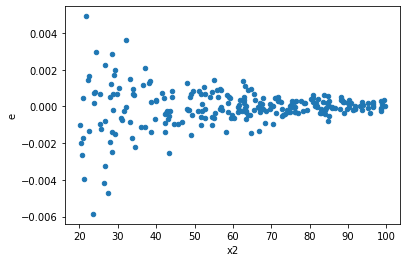

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.0004577863158470444,2.0745831574181313e-05,4.671288937214739e-06,2.1169215892021747e-07,0.04531771889204506,5.1938332123819796e-40,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.0004225541743942595,2.2042810599107734e-05,4.311777289737342e-06,2.2492663876640544e-07,0.05216564392176831,2.742255766075157e-37,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.0002461146136728234,3.4652731954490284e-05,2.5113736089063614e-06,3.5359930565806414e-07,0.140799164411084,1.5882625785867742e-19,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.0002698649125833378,3.303418098115023e-05,2.7537235977891615e-06,3.370834793994921e-07,0.12241006311240568,7.915640858809203e-22,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.0003889457064817612,2.2610942189615907e-05,3.968833739609808e-06,2.3072389989403986e-07,0.05813392926777609,3.2184774290738944e-35,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.0003832751368863141,2.5293204693315625e-05,3.910970784554226e-06,2.580939254419962e-07,0.06599229185277942,7.8981762679495e-33,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.0002995640895686079,2.4174497110887176e-05,3.056776424169468e-06,2.466785419478283e-07,0.08069891536632462,4.057113039692973e-29,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.000227484385100927,2.1576393382123488e-05,2.3212692357237448e-06,2.2016727940942335e-07,0.09484779965249389,3.1949958751562544e-26,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.00043706103942397004,2.836846458623668e-05,4.459806524734388e-06,2.894741284309865e-07,0.06490732878781702,3.865188781001535e-33,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64